# Intro to Polars with NYC taxi data
Let's go over the basics of using the Polars python API

In [5]:
import polars as pl

## Parquet vs Arrow
Reading in a parquet or any other file that requires convertion will always be slower than directly reading from an arrow file. Note the run times of these code blocks.

In [3]:
df = pl.read_parquet("data/fhvhv_tripdata_2023-01.parquet")

In [4]:
df.write_ipc("data/fhvhv_data.arrow")

In [5]:
df = pl.read_ipc("data/fhvhv_data.arrow")


## Polars expressions and data manipulation

### Select
The select method is very straigth forwar you can pass names of columns, or list of olars column objects and select a subset of the dataframe.

In [6]:
df2 = df.select('hvfhs_license_num', 'dispatching_base_num', 'tolls', 'sales_tax','tips', 'trip_miles', 'trip_time')
df2.head()

hvfhs_license_num,dispatching_base_num,tolls,sales_tax,tips,trip_miles,trip_time
str,str,f64,f64,f64,f64,i64
"""HV0003""","""B03404""",0.0,2.21,0.0,1.18,664
"""HV0003""","""B03404""",0.0,1.06,0.0,0.82,460
"""HV0003""","""B03404""",0.0,2.65,0.0,1.18,595
"""HV0003""","""B03404""",0.0,0.7,0.0,1.65,303
"""HV0003""","""B03404""",0.0,0.84,0.0,1.65,461


In [7]:
df3 = df.select(pl.col('tolls'), pl.col('tips'))
df3.head()

tolls,tips
f64,f64
0.0,0.0
0.0,0.0
0.0,0.0
0.0,0.0
0.0,0.0


### Filter
You can filter a polars dataframe on an predicate expression.

In [6]:
df2.filter(pl.col('tips') > 5).head()

hvfhs_license_num,dispatching_base_num,tolls,sales_tax,tips,trip_miles,trip_time
str,str,f64,f64,f64,f64,i64
"""HV0003""","""B03404""",0.0,3.45,10.0,3.93,1389
"""HV0003""","""B03404""",0.0,2.03,5.11,10.05,1362
"""HV0003""","""B03404""",0.0,3.14,7.92,7.92,1506
"""HV0003""","""B03404""",0.0,1.78,5.03,1.86,515
"""HV0003""","""B03404""",0.0,2.73,5.1,5.07,2088


In [10]:
df3.filter((pl.col('tolls') != 0) & (pl.col('tips')!=0)).head()

tolls,tips
f64,f64
0.18,2.0
6.55,9.62
4.44,8.77
6.55,4.96
6.55,6.13


### Make new dataframe  with_columns and alias
The biggest difference I've found when coming from pandas to polars is how to do some logic and then create new columns!

In [7]:
df2.with_columns(pl.col("trip_miles").round(1).alias("rounded_miles")).head()

hvfhs_license_num,dispatching_base_num,tolls,sales_tax,tips,trip_miles,trip_time,rounded_miles
str,str,f64,f64,f64,f64,i64,f64
"""HV0003""","""B03404""",0.0,2.21,0.0,1.18,664,1.2
"""HV0003""","""B03404""",0.0,1.06,0.0,0.82,460,0.8
"""HV0003""","""B03404""",0.0,2.65,0.0,1.18,595,1.2
"""HV0003""","""B03404""",0.0,0.7,0.0,1.65,303,1.7
"""HV0003""","""B03404""",0.0,0.84,0.0,1.65,461,1.7


### Aggregate
groupby and aggregations will be very useful in data handling for visualizations. This is how you can use it to create a dataframe showcasing the distribution of rides based on time and miles.

In [6]:
df.select('hvfhs_license_num', 'dispatching_base_num', 'tolls', 'sales_tax','tips', 'trip_miles', 'trip_time').with_columns(
            [
                pl.col("trip_miles")
                .round(0)
                .alias("rounded_miles"),
                ((pl.col("trip_time")/1000).round(0)*1000)
                .alias("rounded_time"),
            ]
).groupby(["rounded_miles", "rounded_time"]).count()

rounded_miles,rounded_time,count
f64,f64,u32
15.0,7000.0,190
25.0,7000.0,227
37.0,8000.0,56
114.0,8000.0,35
65.0,6000.0,209
65.0,5000.0,398
65.0,4000.0,130
53.0,9000.0,13
67.0,5000.0,317


## Lazy vs eager
Polars lazy API allows you to build queries on data but waits on execution untill you say it's time. Here's an example of how using the two differs.
Also note the run time on the lazy calculation, it's a lot faster than the eager one!

### Eager API with dataframe
So far we've only been using the eager API. Eager means polars will execute each expression as soon as we decalare them one after the other.

In [6]:
df.select(
    "hvfhs_license_num",
    "dispatching_base_num",
    "tolls",
    "sales_tax",
    "tips",
    "trip_miles",
    "trip_time",
).with_columns(
    [
        pl.col("trip_miles").round(0).alias("rounded_miles"),
        ((pl.col("trip_time")/100).round(0)*100)
        .alias("rounded_time"),
        pl.col("dispatching_base_num").cast(pl.Categorical),
    ]
).sort(
    pl.col("sales_tax")
).sort(
    pl.col("rounded_miles")
).filter(
    pl.col("rounded_miles") > 100
).filter(
    pl.col("rounded_time") > 10
).filter(pl.col("dispatching_base_num") == "B03404")

hvfhs_license_num,dispatching_base_num,tolls,sales_tax,tips,trip_miles,trip_time,rounded_miles,rounded_time
str,cat,f64,f64,f64,f64,i64,f64,f64
"""HV0003""","""B03404""",41.3,0.0,0.0,100.65,7763,101.0,7800.0
"""HV0003""","""B03404""",8.3,0.0,0.0,100.96,6306,101.0,6300.0
"""HV0003""","""B03404""",33.4,0.0,0.0,100.51,6730,101.0,6700.0
"""HV0003""","""B03404""",21.25,0.0,0.0,101.33,8193,101.0,8200.0
"""HV0003""","""B03404""",21.0,0.0,0.0,101.24,7381,101.0,7400.0
"""HV0003""","""B03404""",35.94,0.0,0.0,100.62,7985,101.0,8000.0
"""HV0003""","""B03404""",8.3,0.0,31.79,100.91,8921,101.0,8900.0
"""HV0003""","""B03404""",8.3,0.0,0.0,101.13,8318,101.0,8300.0
"""HV0003""","""B03404""",37.75,0.0,0.0,101.02,7339,101.0,7300.0


### Lazy API with lazyframe
What makes polars really powerful is its lazy computation mode. If you add a .lazy() to the end of your dataframe or instead of reading a file use one of the scan methods, your data is used to build a lazyframe instead of a dataframe. You can use almost all the same expressions and methods on a lazyframe but polars won’t execute any computations until you indicate it should by using the .collect() method.

#### Build first

In [7]:
ldf = pl.scan_ipc("data/fhvhv_data.arrow")
query = ldf.select(
    "hvfhs_license_num",
    "dispatching_base_num",
    "tolls",
    "sales_tax",
    "tips",
    "trip_miles",
    "trip_time",
).with_columns(
    [
        pl.col("trip_miles").round(0).alias("rounded_miles"),
        ((pl.col("trip_time")/100).round(0)*100)
        .alias("rounded_time"),
        pl.col("dispatching_base_num").cast(pl.Categorical),
    ]
).sort(
    pl.col("sales_tax")
).sort(
    pl.col("rounded_miles")
).filter(
    pl.col("rounded_miles") > 100
).filter(
    pl.col("rounded_time") > 10
).filter(pl.col("dispatching_base_num") == "B03404")

#### Then use collect for computation to fire

In [8]:
query.collect()

hvfhs_license_num,dispatching_base_num,tolls,sales_tax,tips,trip_miles,trip_time,rounded_miles,rounded_time
str,cat,f64,f64,f64,f64,i64,f64,f64
"""HV0003""","""B03404""",41.3,0.0,0.0,100.65,7763,101.0,7800.0
"""HV0003""","""B03404""",8.3,0.0,0.0,100.96,6306,101.0,6300.0
"""HV0003""","""B03404""",33.4,0.0,0.0,100.51,6730,101.0,6700.0
"""HV0003""","""B03404""",21.25,0.0,0.0,101.33,8193,101.0,8200.0
"""HV0003""","""B03404""",21.0,0.0,0.0,101.24,7381,101.0,7400.0
"""HV0003""","""B03404""",35.94,0.0,0.0,100.62,7985,101.0,8000.0
"""HV0003""","""B03404""",8.3,0.0,31.79,100.91,8921,101.0,8900.0
"""HV0003""","""B03404""",8.3,0.0,0.0,101.13,8318,101.0,8300.0
"""HV0003""","""B03404""",37.75,0.0,0.0,101.02,7339,101.0,7300.0


### Visualize the lazy API execution 
You can check the graph of execution for a lazy query. Notice how polars will filter then sort the data eventhough in my chain of queries it's the other way around. This is one of many ways polars will optimize a lazy query before execution.

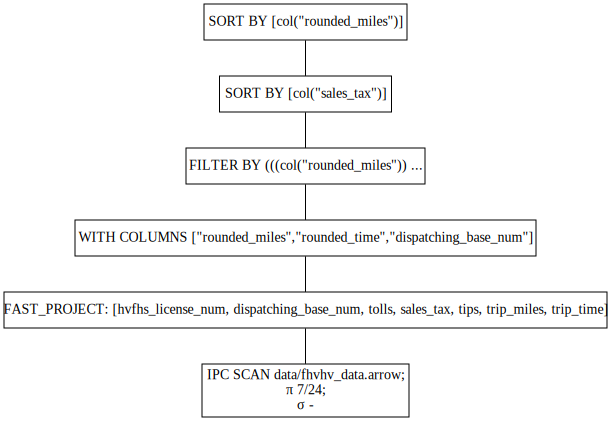

In [9]:
query.show_graph()